Ativos do IBOV

In [1]:
from yahoo import lista_ativos
lista = lista_ativos()
print('Número de ativos:', len(lista))

Número de ativos: 1010


Computa rank MME dos ativos

In [2]:
import pandas as pd
from rank import rank_mme
periodo = 64
janelas = [9, 30, 200]

lista_rank = []
dicio_df = {}
for ativo in lista:
    rank, df_ativo = rank_mme(ativo, janelas, periodo)
    if len(df_ativo) > 0:
        dicio_df[ativo] = df_ativo
        atual = {'ativo': ativo, 'rank': rank}
        lista_rank.append(atual)

lista_rank = [item for item in lista_rank
              if item['rank'] != float('-inf')]
lista_rank.sort(key=lambda x: x['rank'], reverse=True)
df = pd.DataFrame(lista_rank)
display(df)

,ativo,rank
0,C2OI34,0.130920
1,M2ST34,0.096531
2,RBVO11,0.071919
3,CRPT11,0.035196
4,HASH11,0.034822
...,...,...
820,D2KS34,-0.070020
821,TECN3,-0.072763
822,ATMP3,-0.079002
823,BIOM3,-0.190883


In [4]:
lista_positives = [item for item in lista_rank
                   if item['rank'] > 0]
print('Número de ativos com rank positivo:', len(lista_positives))

Número de ativos com rank positivo: 241


Gráficos

C2OI34 : 0.13091966405698174


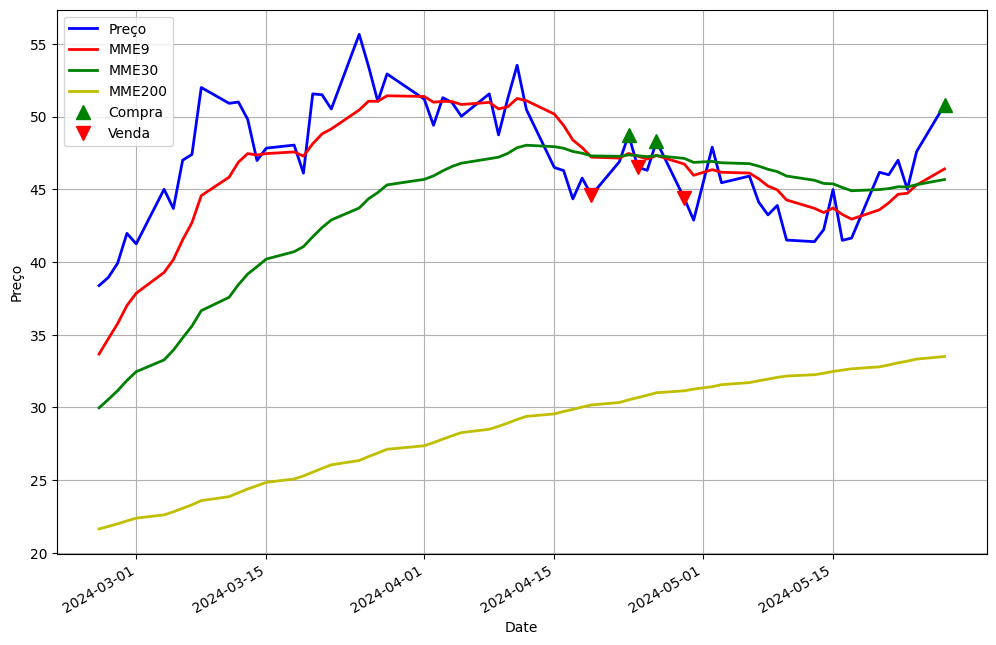

M2ST34 : 0.09653088519570094


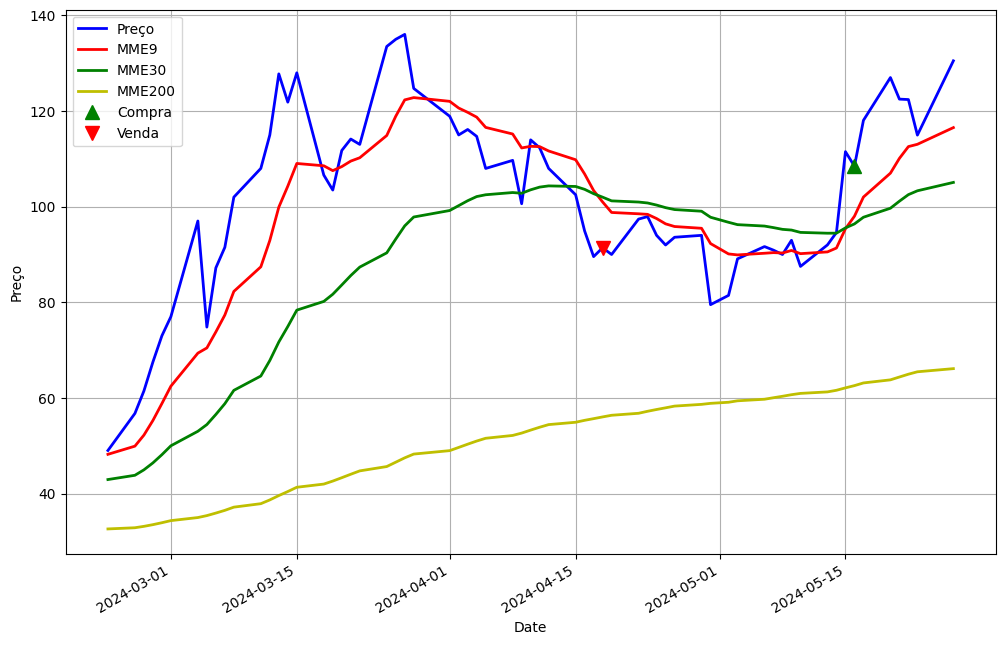

RBVO11 : 0.0719193524854875


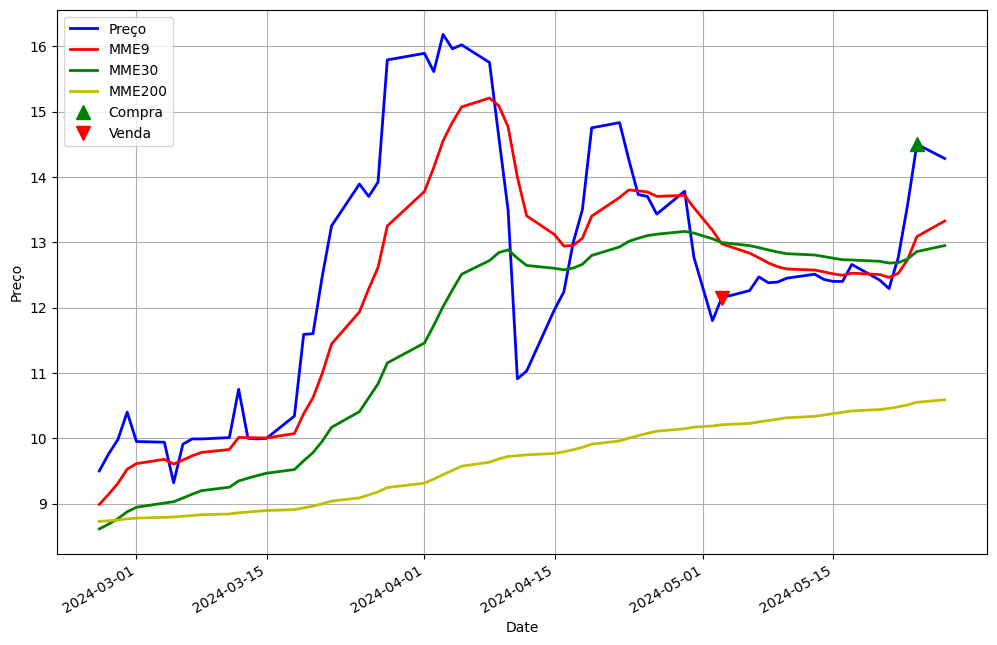

CRPT11 : 0.0351963383734586


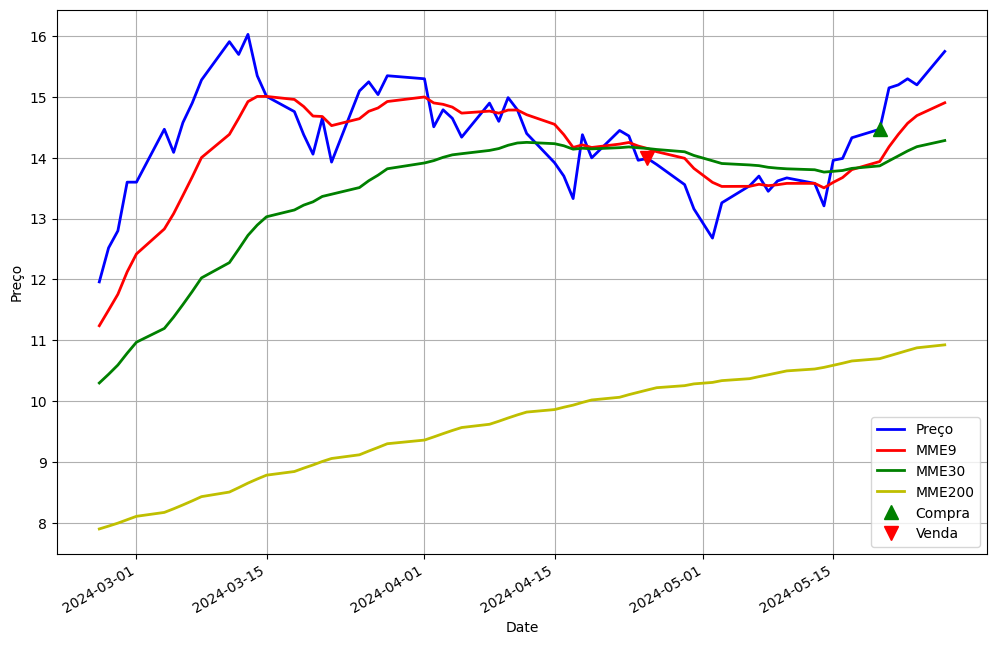

HASH11 : 0.03482238081147993


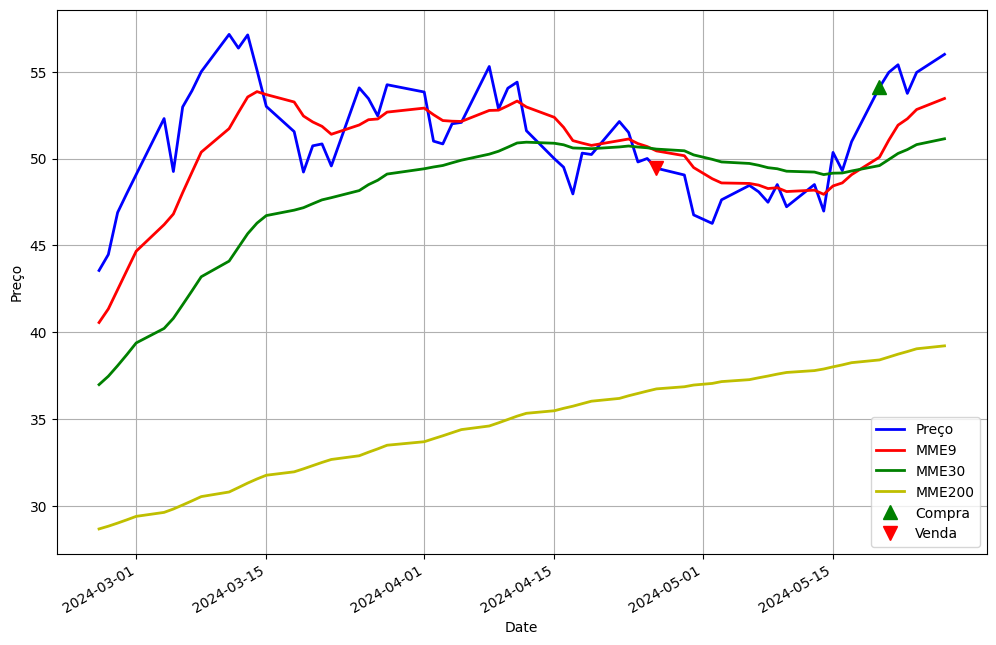

ETHE11 : 0.03030131341767443


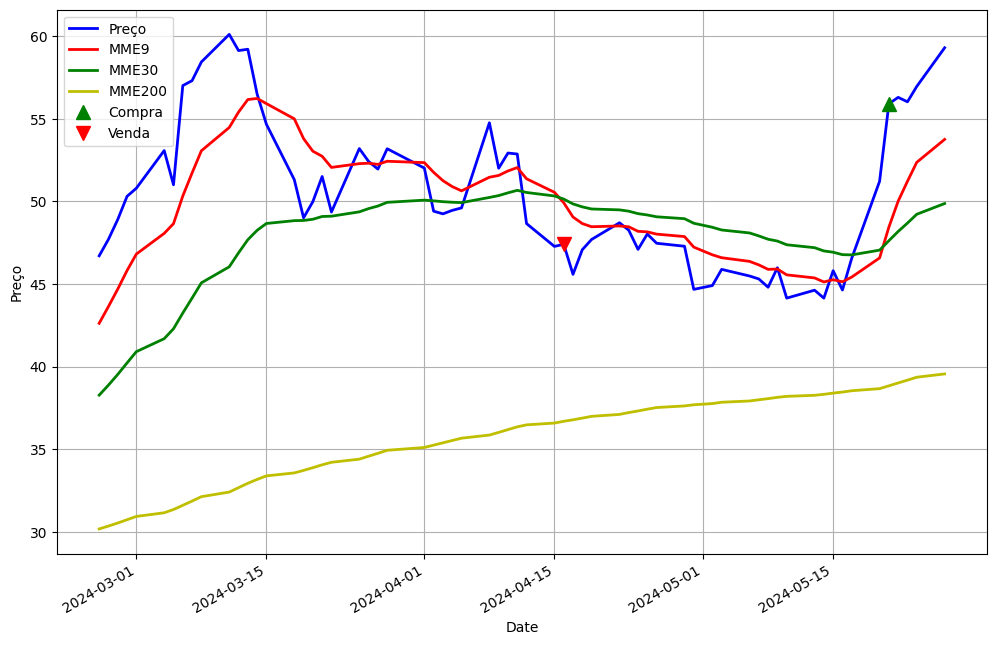

BITH11 : 0.03029566077701955


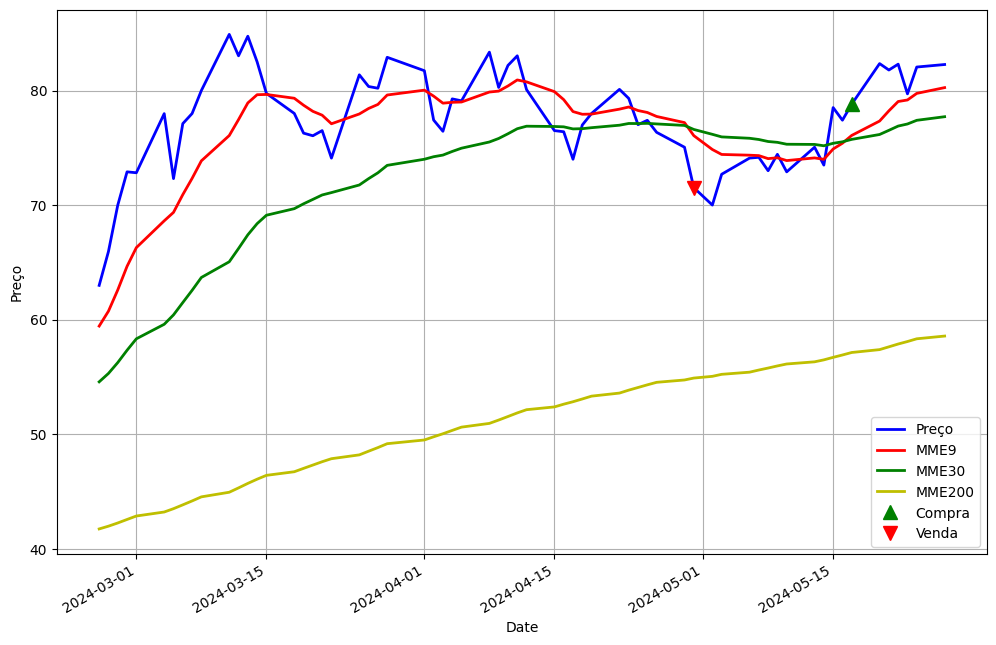

M1TA34 : 0.0298707898520459


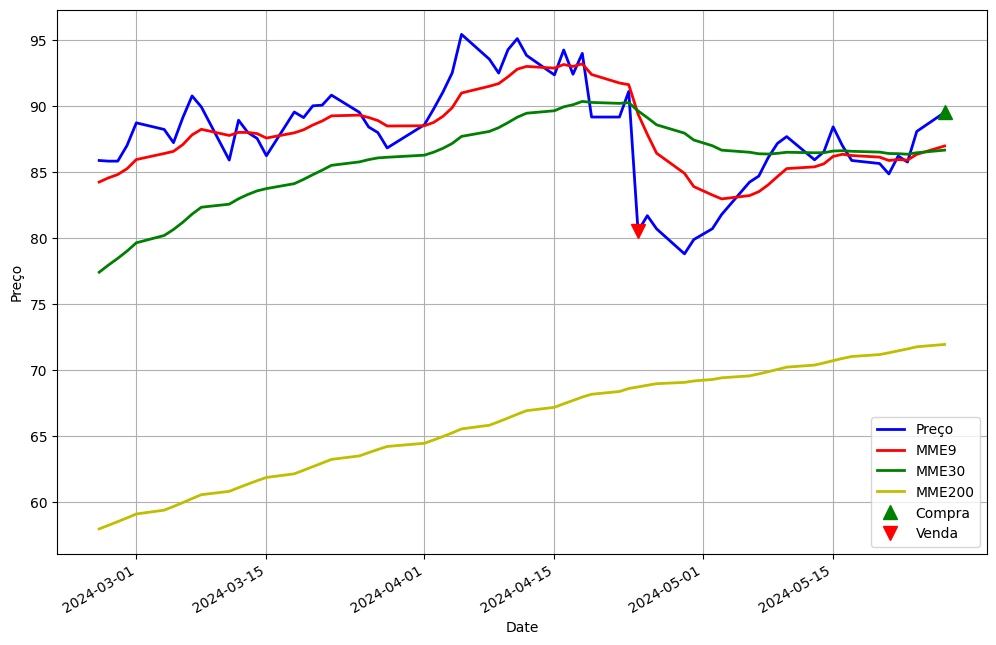

QBTC11 : 0.029454591719158124


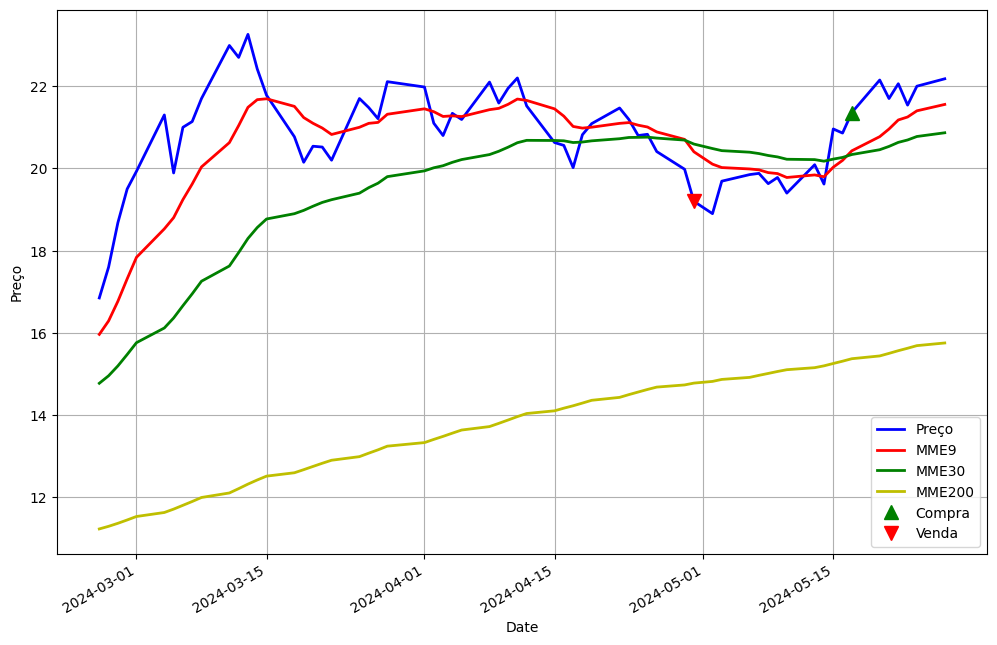

DEFI11 : 0.029125596500131072


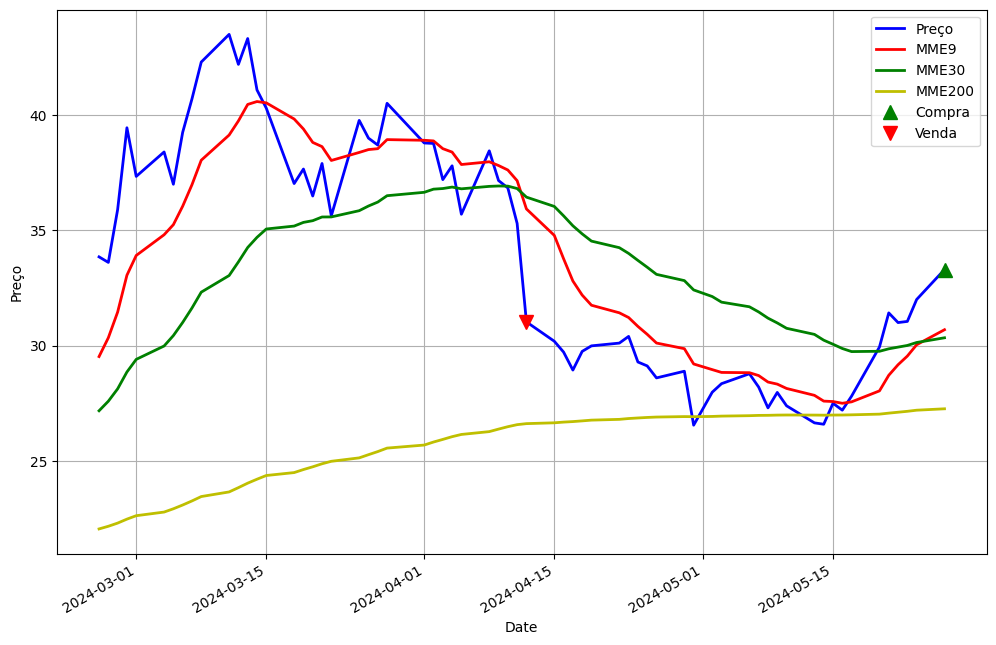

In [3]:
from rank import plota_mme
for item in lista_rank[:10]:
    print(item['ativo'], ':', item['rank'])
    df_ativo = dicio_df[item['ativo']]
    plota_mme(df_ativo, janelas)
    